# Visualise Metric CSV

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np

## Ave Task Accuracy

### Path

In [3]:
# Finetuning_1 multiruns (10tasks, epoch=9)

metric = "test_metrics"
# metric = "forgetting_ratio"


csv_path_list = ["../../logs_saved/summary/Finetuning_1/runs/1/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/2/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/3/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/4/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/5/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/6/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/7/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/8/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/9/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/10/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/10/csv/test_metrics.csv",
]
legend_list = ["run 1", "run 2", "run 3", "run 4", "run 5", "run 6", "run 7", "run 8", "run 9", "run 10"]

In [25]:
# Baseline (50 tasks epoch-=9)
# task acc


metric = "test_metrics"
# metric = "forgetting_ratio"

csv_path_list = [f"../../logs_saved/summary/HAT_1/runs/1/csv/{metric}.csv",
                 f"../../logs_saved/summary/Finetuning_1/runs/13/csv/{metric}.csv",
                 f"../../logs_saved/summary/EWC_1/runs/1/csv/{metric}.csv",
                 f"../../logs_saved/summary/LwF_1/runs/1/csv/{metric}.csv",
                 f"../../logs_saved/summary/AdaHAT_1/runs/2_ada/csv/{metric}.csv"
]
legend_list = ["HAT","Finetuning", "EWC", "LwF", "AdaHAT"]
y_label = "Average Classification Accuracy (Over Tasks)"



In [ ]:
# Baselines (20 tasks, epoch=2)

metric = "test_metrics"
# metric = "forgetting_ratio"

baselines = [
    "Finetuning_1",
    "EWC_1", 
    "HAT_1", 
    "ada", 
    "ada_ave", 
    "ada_prob", 
    "ada_ave_prob", 
    "ada_cons_alpha_all",
    "ada_random_all",
    "ada_reg_1",
    "ada_reg_0",
    "ada_sum_1",
    "ada_sum_t",
]

csv_path_list = [f"../../logs_saved/s/{b}/runs/{metric}.csv" for b in baselines]

legend_list = [
    "Finetuning", 
    "EWC", 
    "HAT",
    "ada", 
    "ada_ave", 
    "ada_prob", 
    "ada_ave_prob", 
    "ada_cons_alpha_all",
    "ada_random_all",
    "ada_reg_1",
    "ada_reg_0",
    "ada_sum_1",
    "ada_sum_t",
]
y_label = "Average Classification Forgetting Ratio (Over Tasks)"


In [4]:
# Mean Baselines (20 tasks, epoch=2)

metric = "test_metrics_mean"
# metric = "test_metrics_std"

# metric = "forgetting_ratio"

baselines = [
    "Finetuning_1",
    # "EWC_1", 
    "HAT_1", 
    "ada", 
    "ada_ave", 
    "ada_prob", 
    "ada_ave_prob", 
    "ada_cons_alpha_all",
    "ada_random_all",
    "ada_reg_1",
    # "ada_reg_0",
    "ada_sum_1",
    "ada_sum_t",
]

csv_path_list = [f"../../logs_saved/l50/{b}/runs/{metric}.csv" for b in baselines]

legend_list = [
    "Finetuning", 
    # "EWC", 
    "HAT",
    "ada", 
    "ada_ave", 
    "ada_prob", 
    "ada_ave_prob", 
    "ada_cons_alpha_all",
    "ada_random_all",
    "ada_reg_1",
    # "ada_reg_0",
    "ada_sum_1",
    "ada_sum_t",
]
y_label = "Average Classification Forgetting Ratio (Over Tasks)"


In [12]:
# Hyperparameter study on AdaHAT (20 tasks, epoch=2)

metric = "test_metrics"
# metric = "forgetting_ratio"

baselines = [
    "1e-6",
    # "2e-6",
    # "3e-6",
    # "4e-6",
    # "5e-6",
    # "6e-6",
    # "7e-6",
    # "8e-6",
    # "9e-6",
    # "1e-5",
    "1e-7",
    "2e-7",
    "3e-7",
    "4e-7",
    "5e-7",
    "6e-7",
    "7e-7",
    "8e-7",
    "9e-7",
]

csv_path_list = [f"../../logs_saved/s20/hparams_study/runs/{b}/csv/{metric}.csv" for b in baselines]

legend_list = [
    "1e-6",
    # "2e-6",
    # "3e-6",
    # "4e-6",
    # "5e-6",
    # "6e-6",
    # "7e-6",
    # "8e-6",
    # "9e-6",
    # "1e-5",
    "1e-7",
    "2e-7",
    "3e-7",
    "4e-7",
    "5e-7",
    "6e-7",
    "7e-7",
    "8e-7",
    "9e-7",
]
y_label = "Average Classification Forgetting Ratio (Over Tasks)"


## Plot average task accuracy

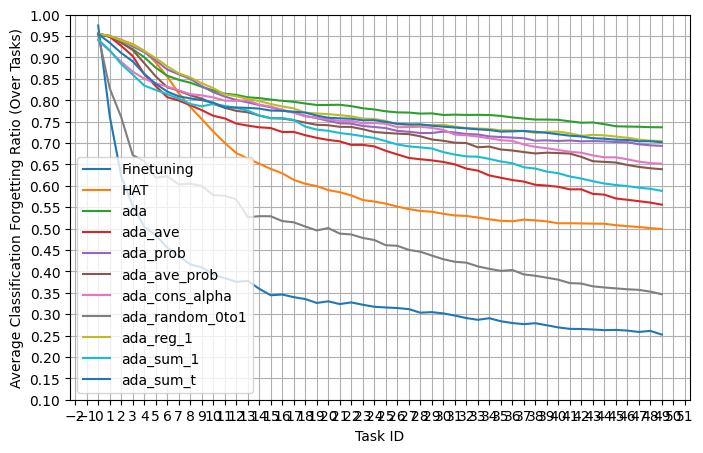

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

# global settings
ax.grid(True)
ax.set_title("")
ax.set_xlabel("Task ID")
ax.set_ylabel(y_label)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_ylim(0.1,1)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))


for csv_path, legend in zip(csv_path_list, legend_list):
    
    # read csv
    with open(csv_path) as csvfile:
        reader = csv.DictReader(csvfile)
        task_column = [int(float(row["task"])) for row in reader]

    with open(csv_path) as csvfile:   
        reader = csv.DictReader(csvfile)
        ave_acc_column = [float(row['test/acc/ave']) for row in reader]
        
    # plot
    ax.plot(task_column, ave_acc_column, label=legend)
    ax.legend()
    
    

plt.show()


## Plot average forgetting ratio

### Path


In [27]:
# Baseline
# fr


csv_path_list = ["../../logs_saved/summary/HAT_1/runs/1/csv/test_forgetting_ratio.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/13/csv/test_forgetting_ratio.csv",
                 "../../logs_saved/summary/EWC_1/runs/1/csv/test_forgetting_ratio.csv",
                 "../../logs_saved/summary/LwF_1/runs/1/csv/test_forgetting_ratio.csv",
                 "../../logs_saved/summary/AdaHAT_1/runs/2_ada/csv/test_forgetting_ratio.csv"
]
legend_list = ["HAT","Finetuning", "EWC", "LwF", "AdaHAT"]
y_label = "Average Classification Forgetting Ratio (Over Tasks)"


SyntaxError: invalid syntax (3829536277.py, line 22)

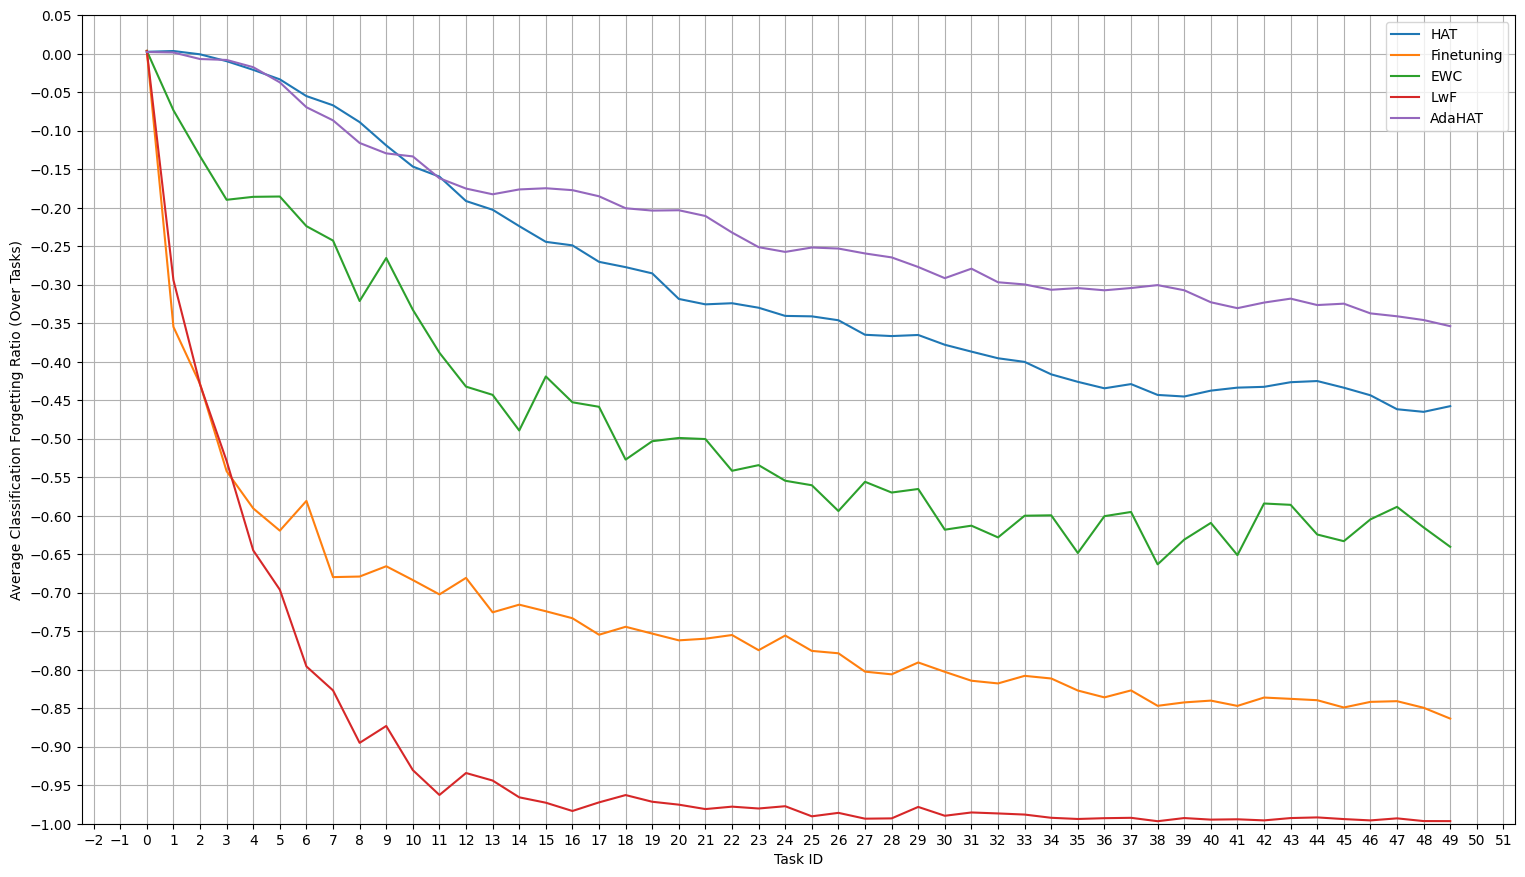

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)


# global settings
ax.grid(True)
ax.set_title("")
ax.set_xlabel("Task ID")
ax.set_ylabel(y_label)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_ylim(-1,0.05)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))


for csv_path, legend in zip(csv_path_list, legend_list):
    
    # read csv
    with open(csv_path) as csvfile:
        reader = csv.DictReader(csvfile)
        task_column = [int(row["task"]) for row in reader]

    with open(csv_path) as csvfile:   
        reader = csv.DictReader(csvfile)
        ave_acc_column = [float(row['test/fr/ave']) for row in reader]
        
    # plot
    ax.plot(task_column, ave_acc_column, label=legend)
    ax.legend()
    
    



plt.show()
